In [3]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

In [5]:
df_OPA= pd.read_csv(r'C:\Users\user\OneDrive\Desktop\CIS 9660 Group Project\Open_Restaurant_Applications.csv')

In [6]:
df_OPA.shape

(12257, 35)

In [7]:
df_OPA.head(5)

,objectid,globalid,Seating Interest (Sidewalk/Roadway/Both),Restaurant Name,Legal Business Name,Doing Business As (DBA),Building Number,Street,Borough,Postcode,...,healthCompliance_terms,Time of Submission,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,12302,{F4FFE759-9440-444D-8301-D9674B698218},roadway,HERE ARTS CENTER,"HOME FOR CONTEMPORARY THEATRE AND ART, LTD",HERE ARTS CENTER,undefined,145 AVENUE OF THE AMERICAS,Manhattan,10013,...,yes,04/22/2021 02:47:00 PM,40.724971,-74.004477,2.0,3.0,37.0,1087061.0,1.004918e+09,SoHo-TriBeCa-Civic Center-Little Italy
1,12301,{58DD8DE5-3E9B-42A1-8259-1DFE769E6A63},both,MEYHANE,DINAH CORP,MEYHANE,undefined,166 2 AVENUE,Manhattan,10003,...,yes,04/22/2021 02:41:00 PM,40.730073,-73.986585,3.0,2.0,40.0,1006434.0,1.004520e+09,East Village
2,10289,{096E1404-EBAE-48F5-8DDF-8ABD9D1F57D1},both,Prince Laban&Chinese restaurent,Renessa inc.,Prince Kababish & Chinese restaurant,3756,74 street,Queens,11372,...,yes,08/15/2020 04:55:00 PM,40.747630,-73.891596,3.0,25.0,289.0,4029808.0,4.012840e+09,Jackson Heights
3,10274,{3B982638-4EB7-4BFE-8FA4-29F2DE80833B},sidewalk,Philly Pretzel Factory,Snacking Made Easy LLC,Philly Pretzel Factory,131,5th Ave,Brooklyn,11217,...,yes,08/15/2020 09:58:00 AM,40.678651,-73.978934,6.0,39.0,131.0,3019193.0,3.009440e+09,Park Slope-Gowanus
4,10259,{2CBACAD1-49B6-4D8D-8F25-A3F415A9C586},roadway,About Coffee,ABOUT COFFEE LLC,ABOUT COFFEE,71,SULLIVAN STREET,Manhattan,10012,...,yes,08/14/2020 05:08:00 PM,40.724625,-74.003889,2.0,3.0,47.0,1007347.0,1.004890e+09,SoHo-TriBeCa-Civic Center-Little Italy


In [8]:
names=df_OPA.columns
names

Index(['objectid', 'globalid', 'Seating Interest (Sidewalk/Roadway/Both)',
       'Restaurant Name', 'Legal Business Name', 'Doing Business As (DBA)',
       'Building Number', 'Street', 'Borough', 'Postcode', 'Business Address',
       'Food Service Establishment Permit #', 'Sidewalk Dimensions (Length)',
       'Sidewalk Dimensions (Width)', 'Sidewalk Dimensions (Area)',
       'Roadway Dimensions (Length)', 'Roadway Dimensions (Width)',
       'Roadway Dimensions (Area)', 'Approved for Sidewalk Seating',
       'Approved for Roadway Seating', 'Qualify Alcohol', 'SLA Serial Number',
       'SLA License Type', 'Landmark District or Building',
       'landmarkDistrict_terms', 'healthCompliance_terms',
       'Time of Submission', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [9]:
df_OPA.isnull().sum() # Need data cleaning 

objectid                                        0
globalid                                        0
Seating Interest (Sidewalk/Roadway/Both)        0
Restaurant Name                                 0
Legal Business Name                             1
Doing Business As (DBA)                        10
Building Number                                 0
Street                                          0
Borough                                         0
Postcode                                        0
Business Address                                0
Food Service Establishment Permit #             5
Sidewalk Dimensions (Length)                 1858
Sidewalk Dimensions (Width)                  1858
Sidewalk Dimensions (Area)                   1858
Roadway Dimensions (Length)                  4407
Roadway Dimensions (Width)                   4407
Roadway Dimensions (Area)                    4407
Approved for Sidewalk Seating                   0
Approved for Roadway Seating                    0


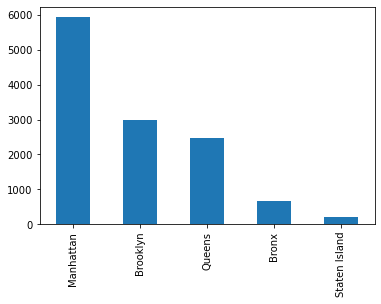

Manhattan        5939
Brooklyn         2979
Queens           2474
Bronx             671
Staten Island     194
Name: Borough, dtype: int64

In [10]:
# restaurant in Borough 
df_OPA['Borough'].value_counts().plot(kind='bar')
plt.show()
region_restaurant_count=df_OPA['Borough'].value_counts()
region_restaurant_count

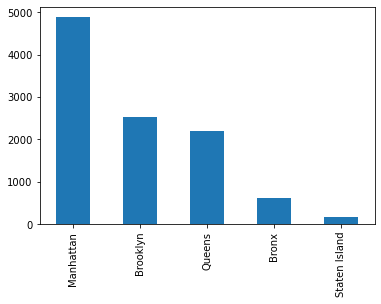

Manhattan        4882
Brooklyn         2520
Queens           2198
Bronx             622
Staten Island     177
Name: Borough, dtype: int64

In [11]:
df_OPA[df_OPA["Approved for Sidewalk Seating"]=='yes']['Borough'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_OPA[df_OPA["Approved for Sidewalk Seating"]=='yes']['Borough'].value_counts()
region_activity_count

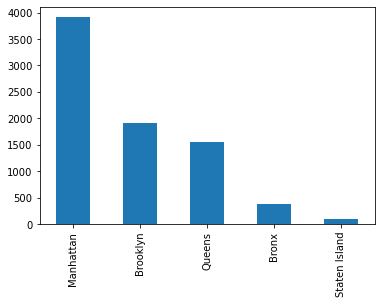

Manhattan        3915
Brooklyn         1908
Queens           1547
Bronx             386
Staten Island      94
Name: Borough, dtype: int64

In [12]:
df_OPA[df_OPA["Approved for Roadway Seating"]=='yes']['Borough'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_OPA[df_OPA["Approved for Roadway Seating"]=='yes']['Borough'].value_counts()
region_activity_count

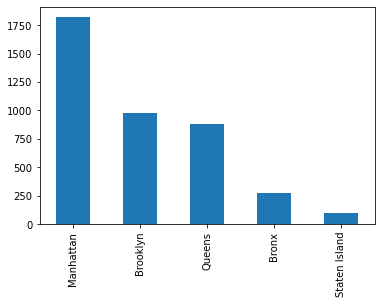

Manhattan        1821
Brooklyn          976
Queens            877
Bronx             274
Staten Island      96
Name: Borough, dtype: int64

In [13]:
# restaurant in sidewalk 
df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='sidewalk']['Borough'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='sidewalk']['Borough'].value_counts()
region_activity_count

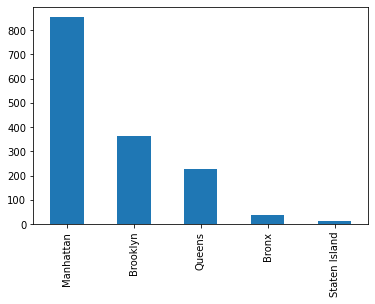

Manhattan        854
Brooklyn         364
Queens           226
Bronx             38
Staten Island     13
Name: Borough, dtype: int64

In [14]:
df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='roadway']['Borough'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='roadway']['Borough'].value_counts()
region_activity_count

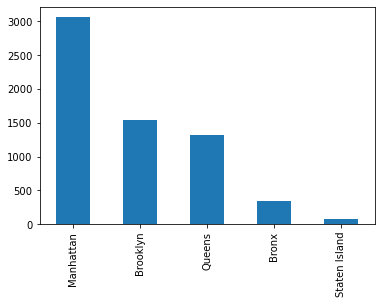

Manhattan        3061
Brooklyn         1544
Queens           1321
Bronx             348
Staten Island      81
Name: Borough, dtype: int64

In [15]:
df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='both']['Borough'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_OPA[df_OPA["Seating Interest (Sidewalk/Roadway/Both)"]=='both']['Borough'].value_counts()
region_activity_count

In [16]:
df_RI['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_inspection_count=df_RI['BOROUGH'].value_counts()
region_inspection_count

NameError: name 'df_RI' is not defined

In [34]:
region_inspection_count


Manhattan        612621
Bronx            572983
Brooklyn         499545
Queens           177067
Staten Island     53889
Name: BOROUGH, dtype: int64

,BOROUGH,Borough
BOROUGH,1.000000,0.549723
Borough,0.549723,1.000000
